# Basic design examples

Up until now, we've looked at a bunch of theory and not explored much in the way of real-life control. This lesson will have a few examples where we do some basic design on realistic control systems.

## Basic proportional control

Let's consider a control system on a mass-spring-damper system governed by the transfer function

$$ \frac{Y\left(s\right)}{X\left(s\right)} = \frac{2K}{s^2 + 10s + 16 + 2K} \text{,} $$

where $K$ is a *gain* that we can choose, $Y\left(s\right)$ describes the position of the mass, and $X\left(s\right)$ describes the input force on the mass.

Straight away, let's look at the poles of the system. We obtain these by setting the denominator of our transfer function to zero:

$$ s^2 + 10s + 16 + 2K = 0 \text{.} $$

We can simply solve this using the quadratic formula, giving poles equal to

$$ s = \frac{-10 \pm \sqrt{100 - 4\left(16 + 2K\right)}}{2} = -5 \pm \sqrt{9-2K} \text{.} $$

Let's look at the locations of the poles as we vary $K$:

| $$K$$ | Pole locations |
|:------|---------------:|
| $$-20$$ | $$-12,+2$$ |
| $$-13.5$$ | $$-11,+1$$ |
| $$-8$$ | $$-10,0$$ |
| $$-3.5$$ | $$-9,-1$$ |
| $$0$$ | $$-2,-8$$ |
| $$2.5$$ | $$-7,-3$$ |
| $$4.5$$ | $$-5,-5$$ |
| $$6.5$$ | $$-5\pm j$$ |
| $$9$$ | $$-5\pm 2j$$ |
| $$12.5$$ | $$-5\pm 3j$$ |
| $$76.5$$ | $$-5\pm 12j$$ |

Notice here that when $K < -8$, one of the poles obtains a positive real part. This is an extremely important observation, since last lesson we learned that a pole with a positive real part is *unstable* and a pole with a real part of $0$ is *marginally stable*. Therefore, for this particular system, we should ensure our gain $K$ is *always* greater than $-8$.

But... What happens if it *is* less than $-8$?

Text(0.5, 0, 'Time (seconds)')

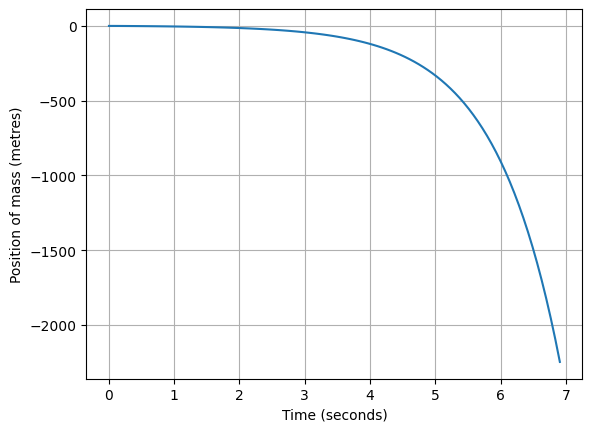

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

# Set up our K and transfer function
K = -13.5
sys = ct.tf(2*K, [1, 10, 16+2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

We can clearly see here that the system is unstable and far from ideal. Here, a step response is effectively asking the control system to move the mass to a position of 1 metre. However, the (unstable) control system is moving the mass further away from the setpoint *at an exponential rate*. This is obviously a bad thing, and we generally try to avoid instability as much as we can.

What about if $K = -8$ exactly? We'll get a marginally stable system, but what would it look like?

Text(0.5, 0, 'Time (seconds)')

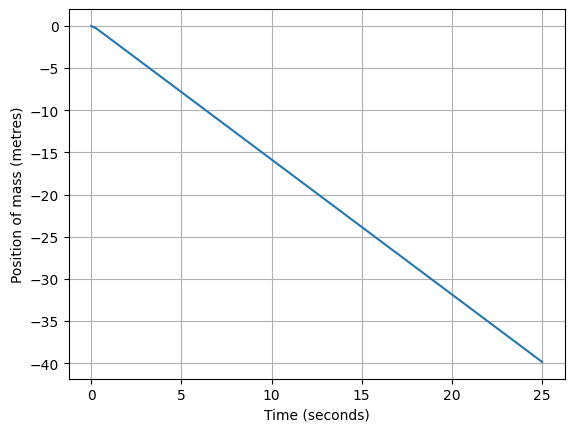

In [28]:
K = -8
sys = ct.tf(2*K, [1, 10, 16+2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

A marginally stable system with a pole at $s = 0$ gives linear behaviour. It's not quite as bad as exponential growth, but it's still far from perfect if we're telling the system to go to a position of 1 metre and it just moves away with a constant velocity.

Now we'll experiment with stable systems, where $K > -8$. Let's begin by trying $K = 2.5$.

Text(0.5, 0, 'Time (seconds)')

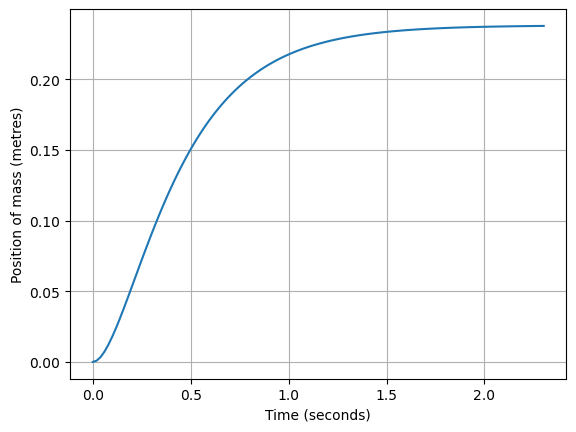

In [29]:
K = 2.5
sys = ct.tf(2*K, [1, 10, 16+2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

This is our first stable system we've got for our example. Note that there is no oscillation; the response has an (upside-down) exponential decay toward a constant settling value. One thing to note for now is that *the system does not reach the setpoint*. We'll discuss this more a bit later.

Finally, let's try a $K$ value that gives complex poles. Let's say, $K = 76.5$.

Text(0.5, 0, 'Time (seconds)')

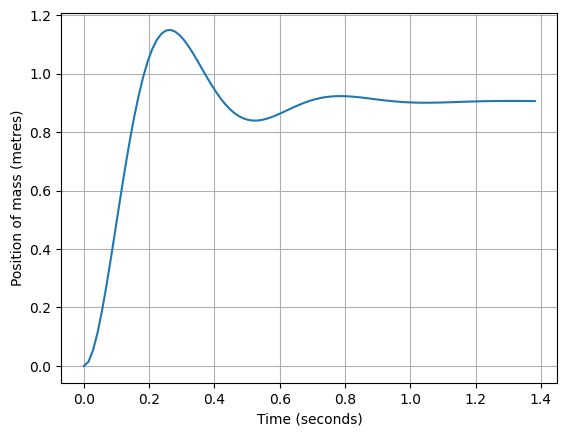

In [30]:
K = 76.5
sys = ct.tf(2*K, [1, 10, 16+2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

With this example, we now have oscillation introduced into the system due to the poles with a large imaginary part relative to the real part. This oscillation may prove beneficial depending on the application, as it may reduce the time to reach steady-state. In our example, we can see that the $K = 76.5$ system reaches close to steady-state in roughly 0.8 seconds, whereas the $K = 5$ system takes roughly 1.5 seconds. However, we should be wary of oscillation; too much oscillation may cause damage to a system, or break some design requirement (such as requiring no overshoot as mentioned in the first lesson). Additionally, we should note that the system does not achieve the desired setpoint.

Through trial-and-error, we can explore several of these gain values and choose the most ideal. In this example, a value of $K = 10$ is quite good for many systems, but each system is unique and requires its own analysis based on application.

Text(0.5, 0, 'Time (seconds)')

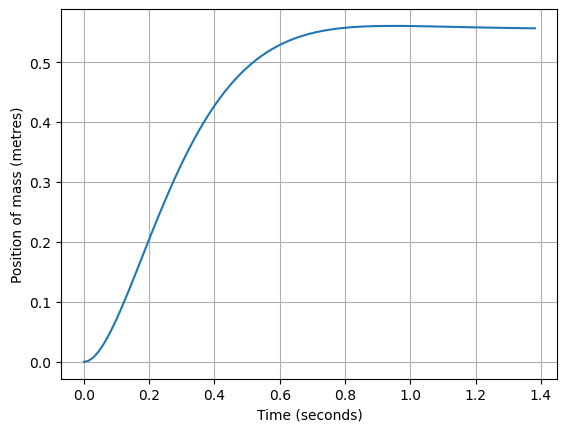

In [33]:
K = 10
sys = ct.tf(2*K, [1, 10, 16+2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

Again, the system does not achieve setpoint following, though it does give a fast response with negligible overshoot.

If we look at our transfer function, we realise we can *never* achieve setpoint following. To achieve setpoint following, we require a DC gain of $1$. However, our DC gain is equal to $\frac{2K}{16+2K}$, which is never equal to $1$ for finite $K$.

## Basic proportional-integral control

Let's now introduce proportional-integral (PI) control. For the exact same system as above, but applying a type of PI controller instead of P, we get the transfer function

$$ \frac{Y\left(s\right)}{X\left(s\right)} = \frac{2K\left(s+1\right)}{s^3 + 10s^2 + 16s + 2K\left(s+1\right)} \text{.} $$

First we'll mention the biggest advantage of PI control. Consider the DC gain of the system:

$$ \text{DC gain} = \left. \frac{2K\left(s+1\right)}{s^3 + 10s^2 + 16s + 2K\left(s+1\right)} \right| _{s = 0} = \frac{2K}{2K} = 1 \text{.} $$

In other words, the DC gain is $1$ regardless of the gain value $K$. Generally speaking, PI controllers give a system setpoint following and eliminate any steady-state error. We'll explore this further a bit later. For now, let's try a few values of $K$.

Text(0.5, 0, 'Time (seconds)')

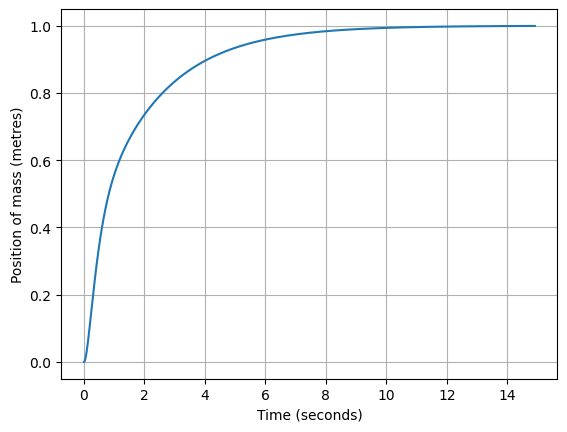

In [41]:
K = 5
sys = ct.tf([2*K,2*K], [1, 10, 16+2*K, 2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

Text(0.5, 0, 'Time (seconds)')

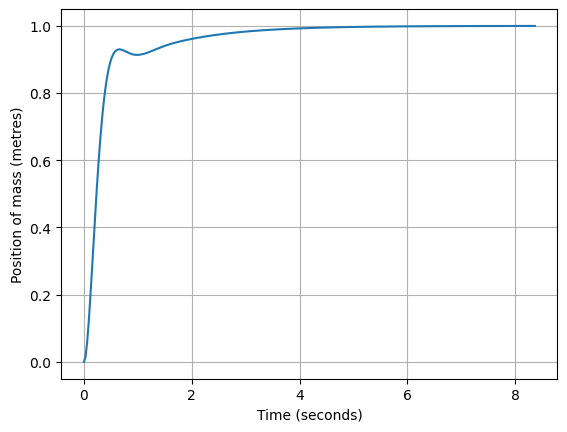

In [42]:
K = 20
sys = ct.tf([2*K,2*K], [1, 10, 16+2*K, 2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

Text(0.5, 0, 'Time (seconds)')

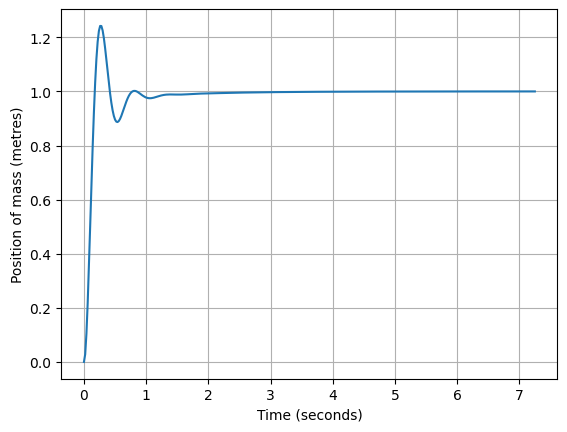

In [43]:
K = 75
sys = ct.tf([2*K,2*K], [1, 10, 16+2*K, 2*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

We can see that in all examples above, we lack any steady-state error as expected. This is great, but often the presence of integral control increases settling time. This is clearly seen in the above figures, where we are taking at least a few seconds to reach our steady-state value.

## Basic proportional-derivative control

While adding integral control eliminates steady-state error, it often increases overshoot. One tool we can use to reduce overshoot is the presence of derivative control, and may be implemented with a proportional-derivative (PD) or proportional-integral-derivative (PID) controller. Here, we'll explore a basic PD controller. The same system as above, but with a basic PD controller, has a transfer function

$$ \frac{Y\left(s\right)}{X\left(s\right)} = \frac{2K\left(s+20\right)}{s^2+10s+16+2K\left(s+20\right)} \text{.} $$

Let's similarly try a few gain values for our PD controller.

Text(0.5, 0, 'Time (seconds)')

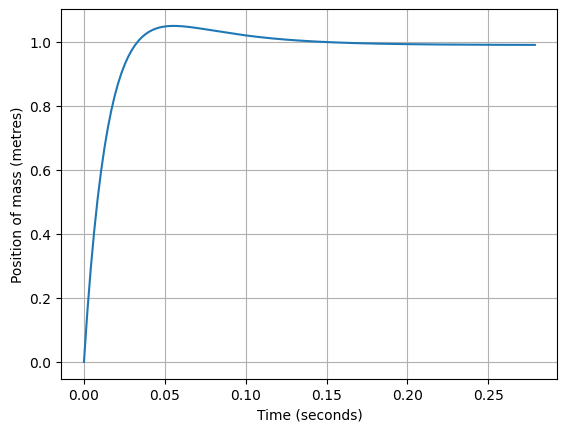

In [62]:
K = 40
sys = ct.tf([2*K,40*K], [1, 10+2*K, 16+40*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

Text(0.5, 0, 'Time (seconds)')

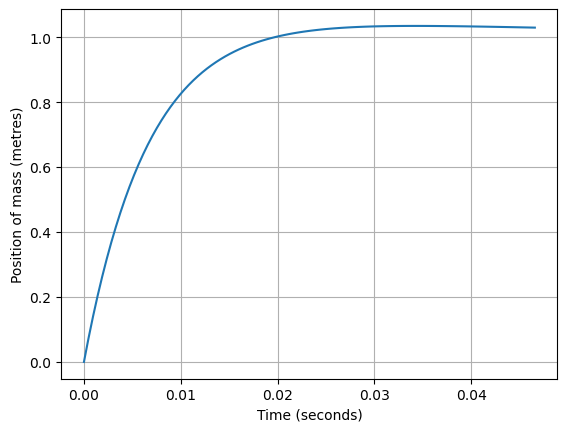

In [61]:
K = 80
sys = ct.tf([2*K,40*K], [1, 10+2*K, 16+40*K])

# Simulate a step response
t,y = ct.step_response(sys)

# Plot output
plt.plot(t,y)
plt.grid()
plt.ylabel('Position of mass (metres)')
plt.xlabel('Time (seconds)')

Notice here that we have *extremely fast* settling times, but with steady-state error. This is because we're able to increase the gain far higher than before (giving us faster settling times) while reducing the corresponding overshoot. In other words, by adding derivative control, we are able to push our proportional control harder without worrying about the overshoot too much. However, derivative control can cause many problems when implemented in real life, as we will see a bit later.

## PID control and some challenges

One simplification we used above is that we only worried about a singular gain value $K$ when designing these controllers. In practice, however, we usually have several gains. For example, a PID controller will often use three gains: $K_P$, $K_I$, and $K_D$. In addition, we often implement a filter constant for the derivative signal, giving us four total parameters to vary. For now, we'll neglect the filter constant and just look at the three PID gains.

A PID controller applied to the above system with three gain parameters will have the transfer function

$$ \frac{Y\left(s\right)}{X\left(s\right)} =  $$